# __Challenge TelecomX ML__

## Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbernalg/challenge_TelecomX/refs/heads/main/data_out/datos_tratados.csv', sep=',')
data.head()

,cancelacion,genero,jubilado,en_pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,...,proteccion_dispositivo,soporte_efectivo,streaming_TV,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cuenta_mensual,cuentas_total,cuentas_diarias
0,0,Femenino,No,Si,Si,9,Si,No,DSL,No,...,No,Si,Si,No,un year,Si,cheque por correo,65.6,593.30,0.242963
1,0,Masculino,No,No,No,9,Si,Si,DSL,No,...,No,No,No,Si,mes a mes,No,cheque por correo,59.9,542.40,0.221852
2,1,Masculino,No,No,No,4,Si,No,Fibra_optica,No,...,Si,No,No,No,mes a mes,Si,cheque electronico,73.9,280.85,0.615833
3,1,Masculino,Si,Si,No,13,Si,No,Fibra_optica,No,...,Si,No,Si,Si,mes a mes,Si,cheque electronico,98.0,1237.85,0.251282
4,1,Femenino,Si,Si,No,3,Si,No,Fibra_optica,No,...,No,Si,Si,No,mes a mes,Si,cheque por correo,83.9,267.40,0.932222


## Encoding

In [3]:
# seleccionar variables categoricas
columns_cat = data.select_dtypes(include='object').columns
print(columns_cat)

Index(['genero', 'jubilado', 'en_pareja', 'dependientes',
       'servicio_telefonico', 'multiples_lineas', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_efectivo', 'streaming_TV', 'streaming_peliculas',
       'tipo_contrato', 'facturacion_electronica', 'metodo_pago'],
      dtype='object')


In [4]:
# aplicamos get_dummies para llevar variables categoricas a numericas
df = pd.get_dummies(data, drop_first=True)
df.sample(5)

,cancelacion,meses_contrato,cuenta_mensual,cuentas_total,cuentas_diarias,genero_Masculino,jubilado_Si,en_pareja_Si,dependientes_Si,servicio_telefonico_Si,...,proteccion_dispositivo_Si,soporte_efectivo_Si,streaming_TV_Si,streaming_peliculas_Si,tipo_contrato_mes a mes,tipo_contrato_un year,facturacion_electronica_Si,metodo_pago_cheque por correo,metodo_pago_tarjeta de credito,metodo_pago_transferencia
1446,0,68,44.80,2983.65,0.021961,True,False,True,True,False,...,False,False,True,False,False,True,False,True,False,False
1870,0,71,19.60,1387.45,0.009202,True,False,True,True,True,...,False,False,False,False,False,False,True,False,False,True
497,0,69,97.65,6743.55,0.047174,True,False,False,False,True,...,True,True,True,False,False,False,True,False,True,False
2677,0,55,94.75,5276.10,0.057424,False,False,True,False,True,...,False,False,True,True,False,True,True,False,False,False
4899,1,36,99.15,3615.60,0.091806,False,False,False,False,True,...,False,False,True,True,True,False,True,False,False,False


> El dataframe pasa de 21 a 26 variables debido al uso del metodo get_dummies.

> El metodo get_dummies identifica si los valores de las variables son datos unicos y de ser asi los convierte en una nueva columna.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cancelacion                              7032 non-null   int64  
 1   meses_contrato                           7032 non-null   int64  
 2   cuenta_mensual                           7032 non-null   float64
 3   cuentas_total                            7032 non-null   float64
 4   cuentas_diarias                          7032 non-null   float64
 5   genero_Masculino                         7032 non-null   bool   
 6   jubilado_Si                              7032 non-null   bool   
 7   en_pareja_Si                             7032 non-null   bool   
 8   dependientes_Si                          7032 non-null   bool   
 9   servicio_telefonico_Si                   7032 non-null   bool   
 10  multiples_lineas_Si                      7032 no

## Analisis de valores faltantes

In [9]:
df.isnull().sum()

cancelacion                                0
meses_contrato                             0
cuenta_mensual                             0
cuentas_total                              0
cuentas_diarias                            0
genero_Masculino                           0
jubilado_Si                                0
en_pareja_Si                               0
dependientes_Si                            0
servicio_telefonico_Si                     0
multiples_lineas_Si                        0
multiples_lineas_sin servicio teleonico    0
servicio_internet_Fibra_optica             0
servicio_internet_No                       0
seguridad_online_Si                        0
respaldo_online_Si                         0
proteccion_dispositivo_Si                  0
soporte_efectivo_Si                        0
streaming_TV_Si                            0
streaming_peliculas_Si                     0
tipo_contrato_mes a mes                    0
tipo_contrato_un year                      0
facturacio

> Variables sin valores faltantes.

## Correlacion entre las variables

In [11]:
corr = df.corr()

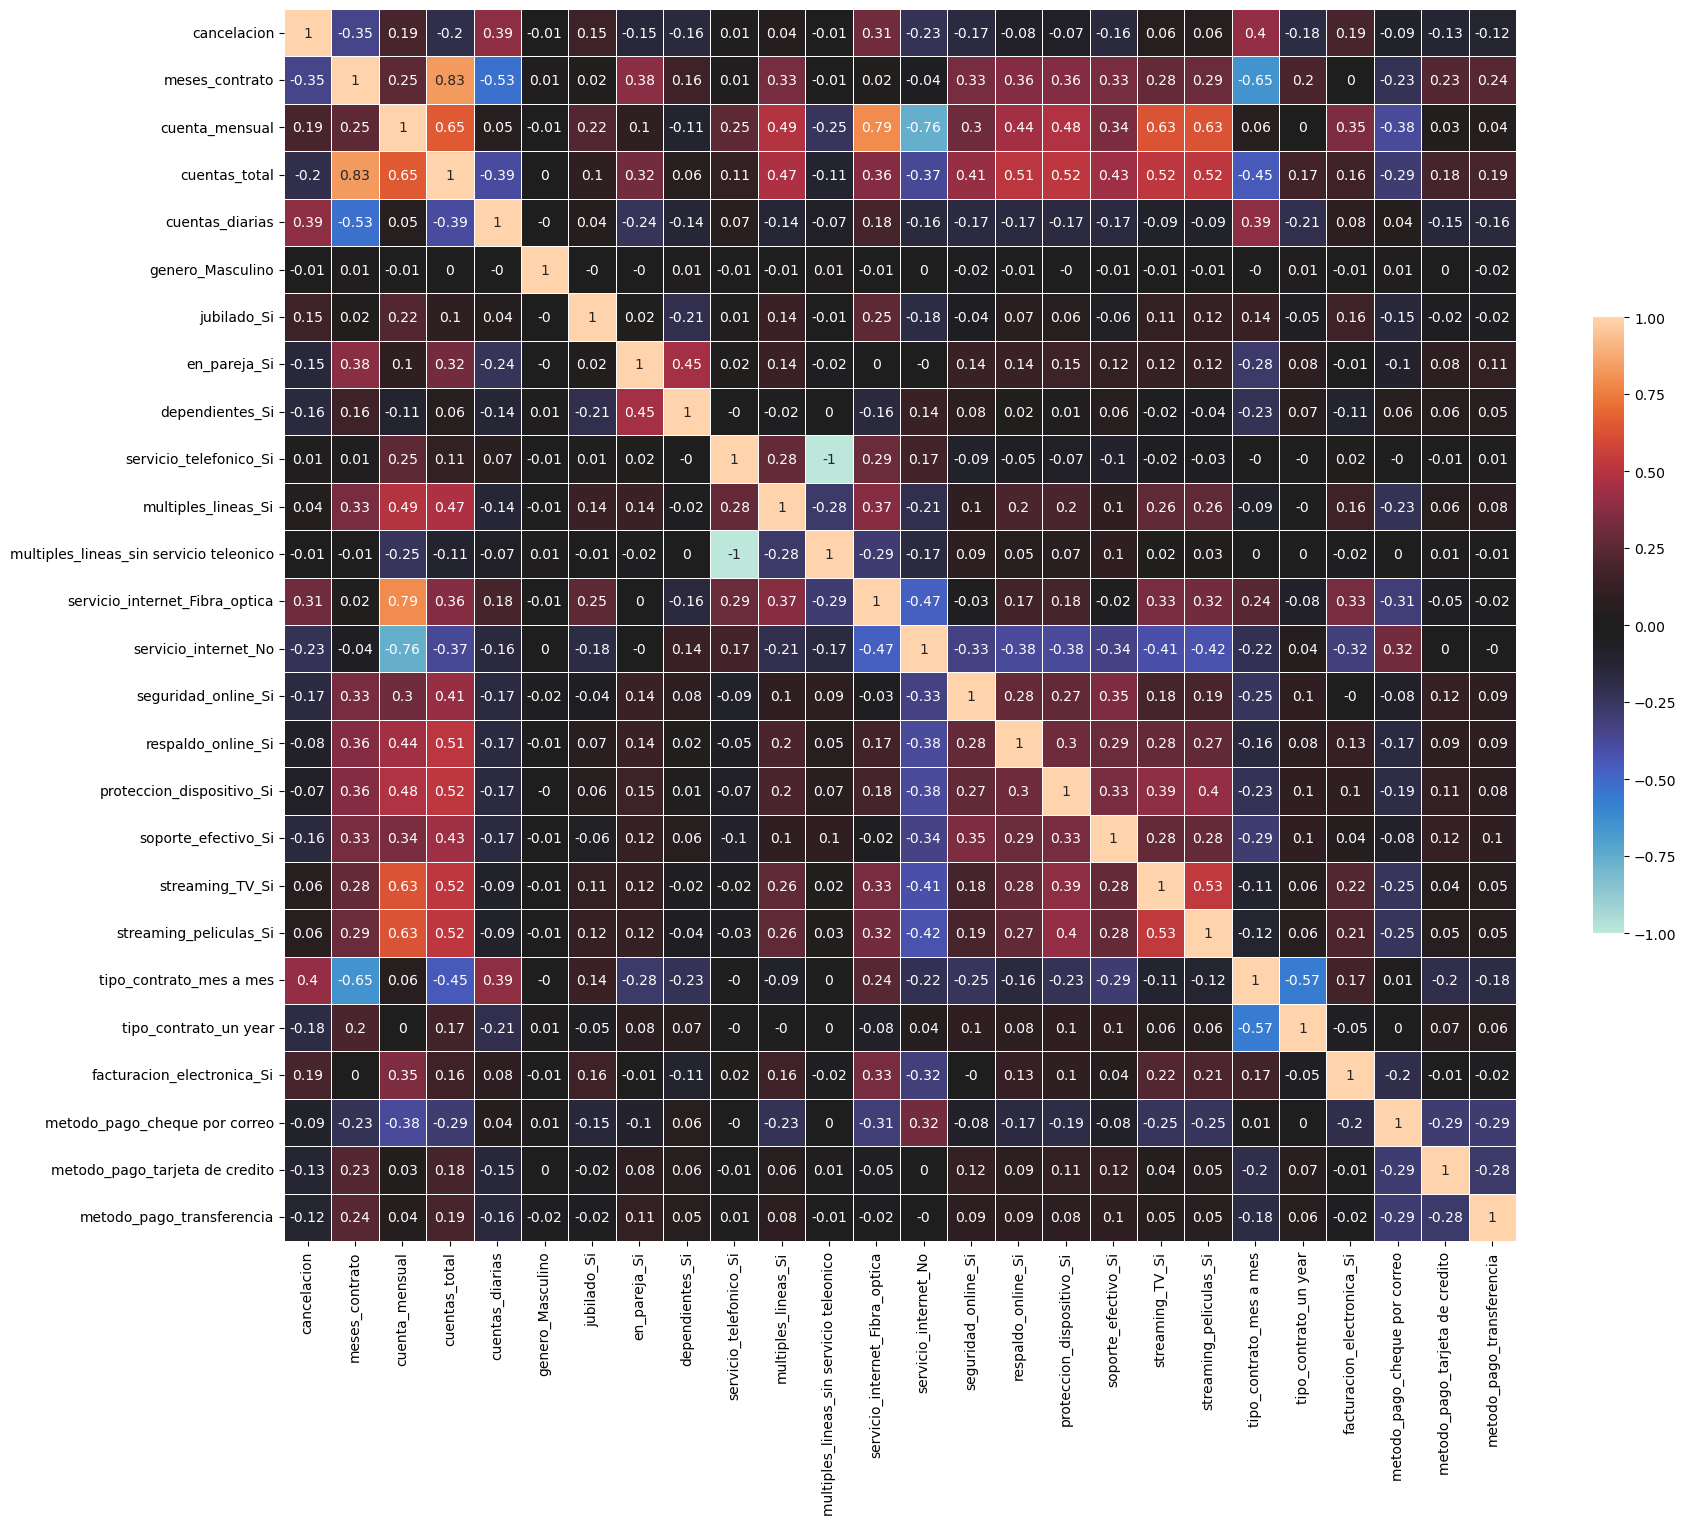

In [13]:
# grafico de mapa de calor
import numpy as np

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=0.5, annot=True, cbar_kws={'shrink': 0.5})

plt.show()

Vamos a crear un filtro para obtener las correlaciones mayores a cierto valor con respecto a la variable objetivo

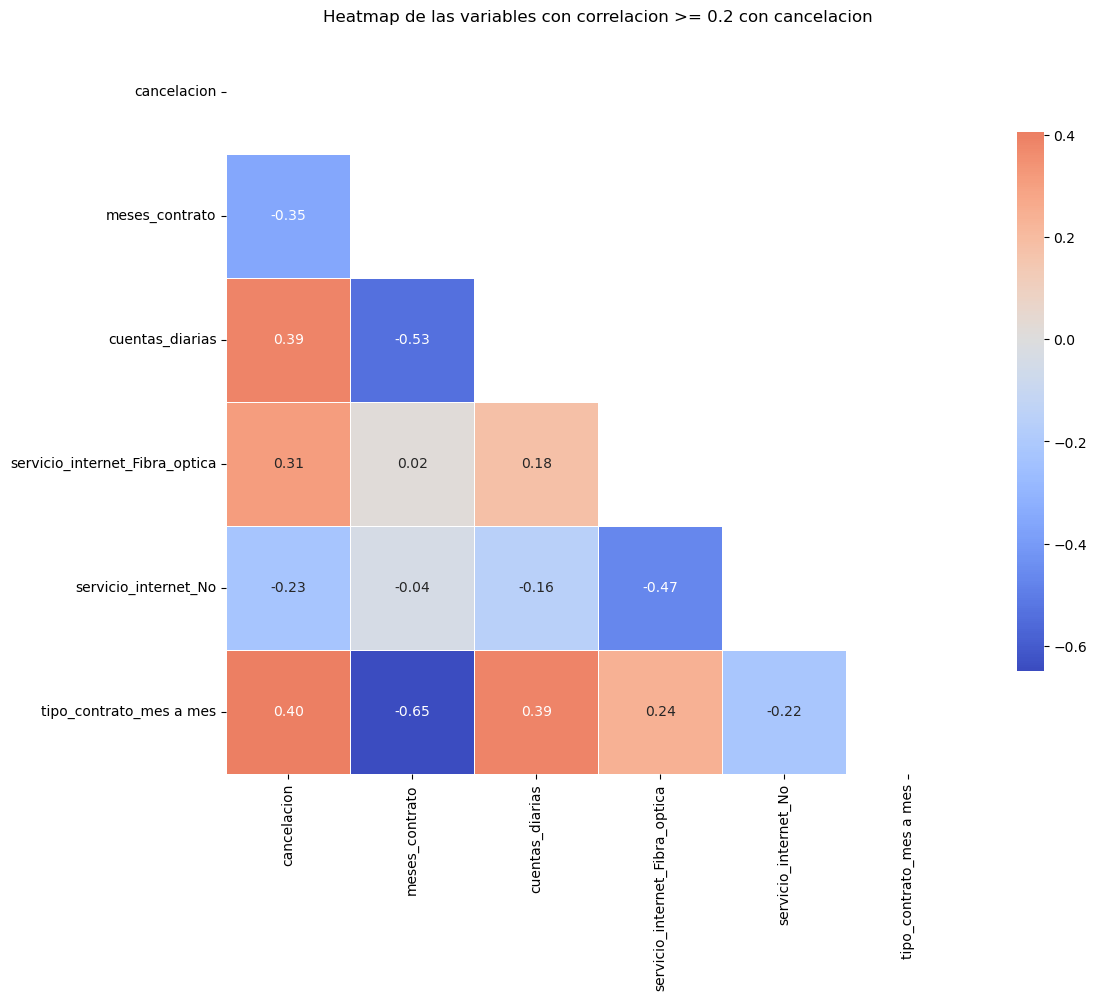

In [15]:
# definir variable objetivo
target = 'cancelacion'

# definir la minima correlacion absoluta
limit = 0.2

# filtrar variables con correlacion absoluta > limit
vars_relevantes = corr.index[abs(corr[target]) >= limit].tolist()

# garantizar que la variable objetivo se encuentre en la lista
if target not in vars_relevantes:
    vars_relevantes.append(target)

# crear matriz de correlacion con solo las variables seleccionadas
corr_filtrada = corr.loc[vars_relevantes, vars_relevantes]

# generar una mascara para omitir el triangulo superior de la matriz
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# grafico de mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.7},
    mask=mascara
)

plt.title(f'Heatmap de las variables con correlacion >= {limit} con {target}')
plt.show()

## Proporcion de la variable objetivo

In [5]:
df['cancelacion'].value_counts(normalize=True)

cancelacion
0    0.734215
1    0.265785
Name: proportion, dtype: float64

> En teoria la proporcion minima de la clase minoritaria es de 40%. Para este caso, vemos que la proporcion de la clase minoritaria es del 26% lo que indica un gran desbalance entre las clases que podria sesgar el modelo al entrenarlo.

## Balanceo de las clases

Vamos a utilizar el metodo SMOTE el cual consiste en sintetizar nueva informacion a partir de la informacion existente. Tales datos sinteticos son relativamente cercanos a los datos reales, pero no son identicos

In [6]:
from imblearn.over_sampling import SMOTE

X = df.drop('cancelacion', axis=1)
y = df['cancelacion']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [7]:
# mostrar dimension de las variables
print(X_res.shape)
print(y_res.shape)

(10326, 25)
(10326,)


> Las clases quedan balanceadas, con la misma cantidad de registros.